# Visualize the results

Here, we load the results for the total of 448 settings (combinations of test fraction, lambda and noise) and we plot the effect of regularization on the test MSE.

In [6]:
import sys
import os

project_root = os.path.abspath(os.path.join(os.getcwd(), '../..'))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

import glob
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from util import set_default_style


In [7]:
files = glob.glob("results/result_*.json")
data_list = []
for filename in files:
    print(filename)
    with open(filename, 'r') as f:
        # Each file has a single JSON line
        record = json.load(f)
        data_list.append(record)

df = pd.DataFrame(data_list)

results/result_352.json
results/result_217.json
results/result_305.json
results/result_78.json
results/result_97.json
results/result_240.json
results/result_169.json
results/result_186.json
results/result_313.json
results/result_256.json
results/result_81.json
results/result_190.json
results/result_39.json
results/result_344.json
results/result_201.json
results/result_128.json
results/result_295.json
results/result_42.json
results/result_446.json
results/result_153.json
results/result_387.json
results/result_368.json
results/result_15.json
results/result_411.json
results/result_104.json
results/result_391.json
results/result_407.json
results/result_112.json
results/result_54.json
results/result_329.json
results/result_283.json
results/result_145.json
results/result_132.json
results/result_427.json
results/result_23.json
results/result_165.json
results/result_74.json
results/result_309.json
results/result_173.json
results/result_62.json
results/result_124.json
results/result_431.json
re

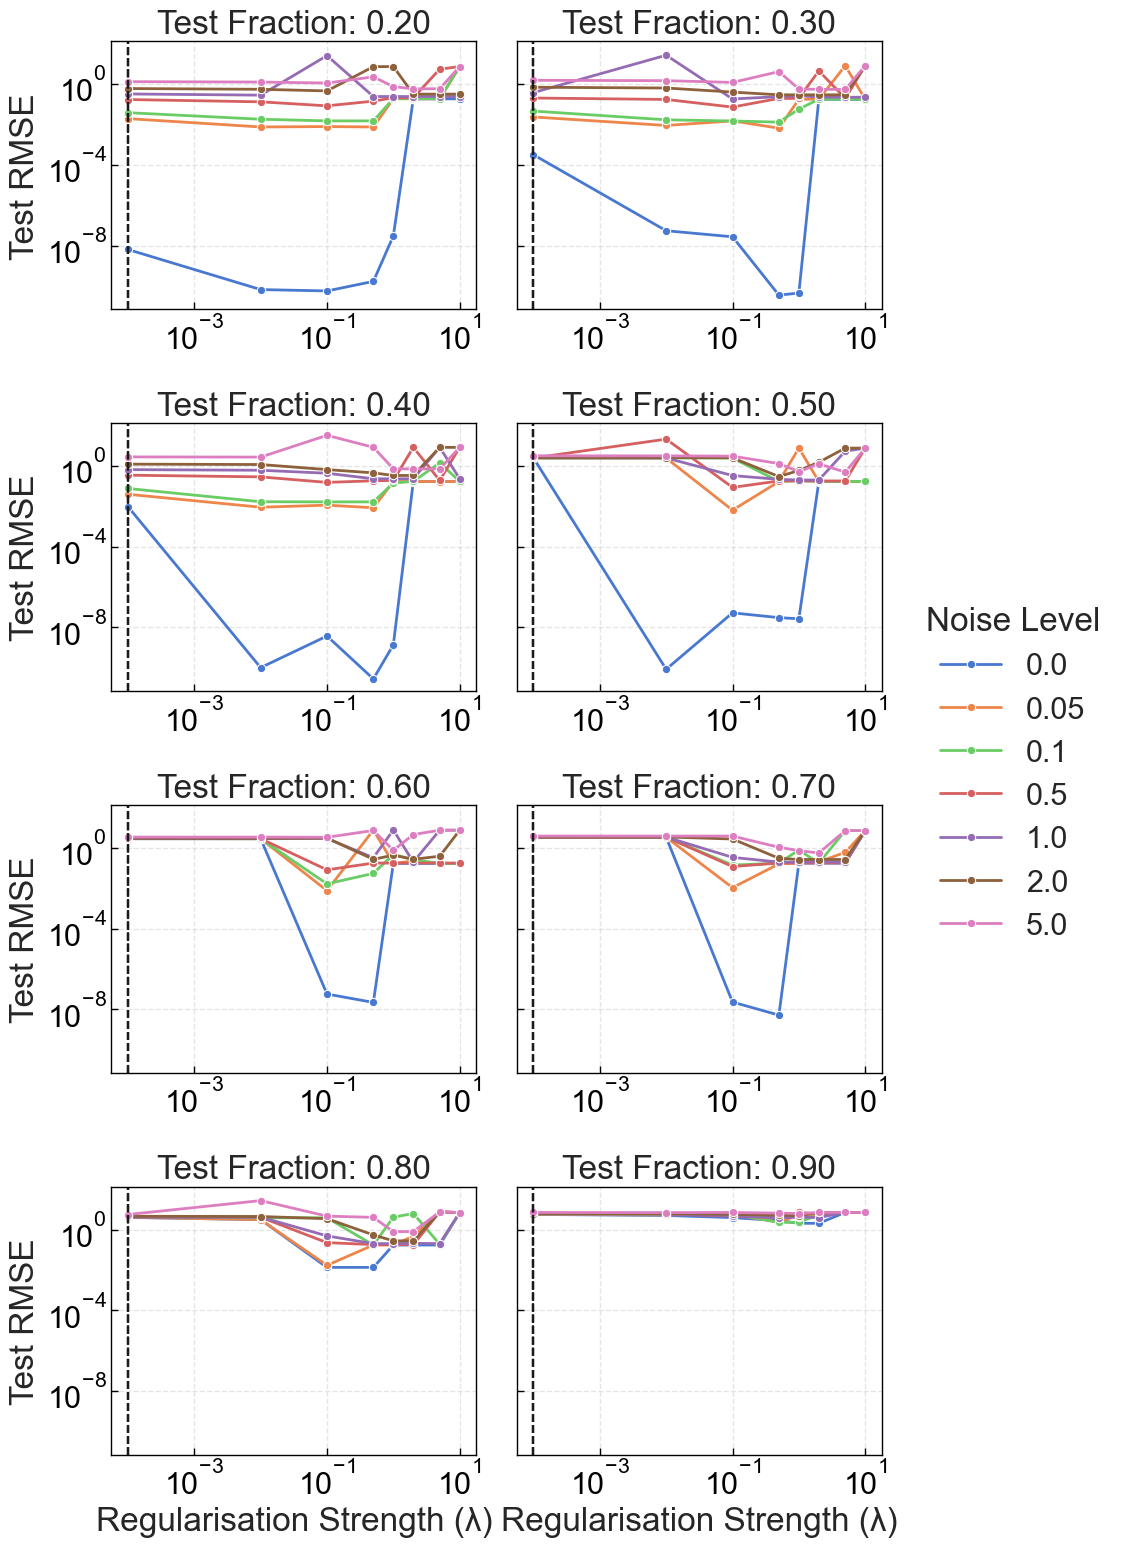

In [8]:
set_default_style(font_scale=2)

lmbd_zero = 1e-4

# Replace λ=0 with 1e-4 for plotting in logscale
plot_df = df[df.test_frac <= 0.95].copy()
plot_df["plot_lambd"] = plot_df["lambd"].replace(0, lmbd_zero)

# Create a FacetGrid using plot_df, colored by 'noise'
g = sns.FacetGrid(
    plot_df,
    col="test_frac",
    hue="noise",
    col_wrap=2,
    height=4,
    aspect=1.20,
    sharey=True,
    sharex=False,
    legend_out=True,
    despine=False,
)

# Plot RMSE vs plot_lambd with markers
g.map(sns.lineplot, "plot_lambd", "rmse", marker="o", lw=2)

# Compute baseline errors from the original df (where λ == 0)
baseline_errors = df[df["lambd"] == 0].groupby("test_frac")["rmse"].mean()

def add_baseline(data, **kwargs):
    test_frac = data["test_frac"].iloc[0]
    if test_frac in baseline_errors.index:
        ax = plt.gca()
        baseline_val = baseline_errors[test_frac]
        ax.axvline(x=lmbd_zero, color="k", linestyle="--")

# Add baseline annotation to each facet
g.map_dataframe(add_baseline)

# Set logarithmic scales for both axes
g.set(xscale="log")
g.set(yscale="log")

# Add legend, axis labels, and overall title
g.add_legend(title="Noise Level")
g.set_axis_labels("Regularisation Strength (λ)", "Test RMSE")

# **Set custom titles for each subplot**
g.set_titles(col_template="Test Fraction: {col_name:.2f}")

# Adjust layout and display the plot
g.tight_layout()

plt.savefig("figures/flux_fitting.pdf", format="pdf")

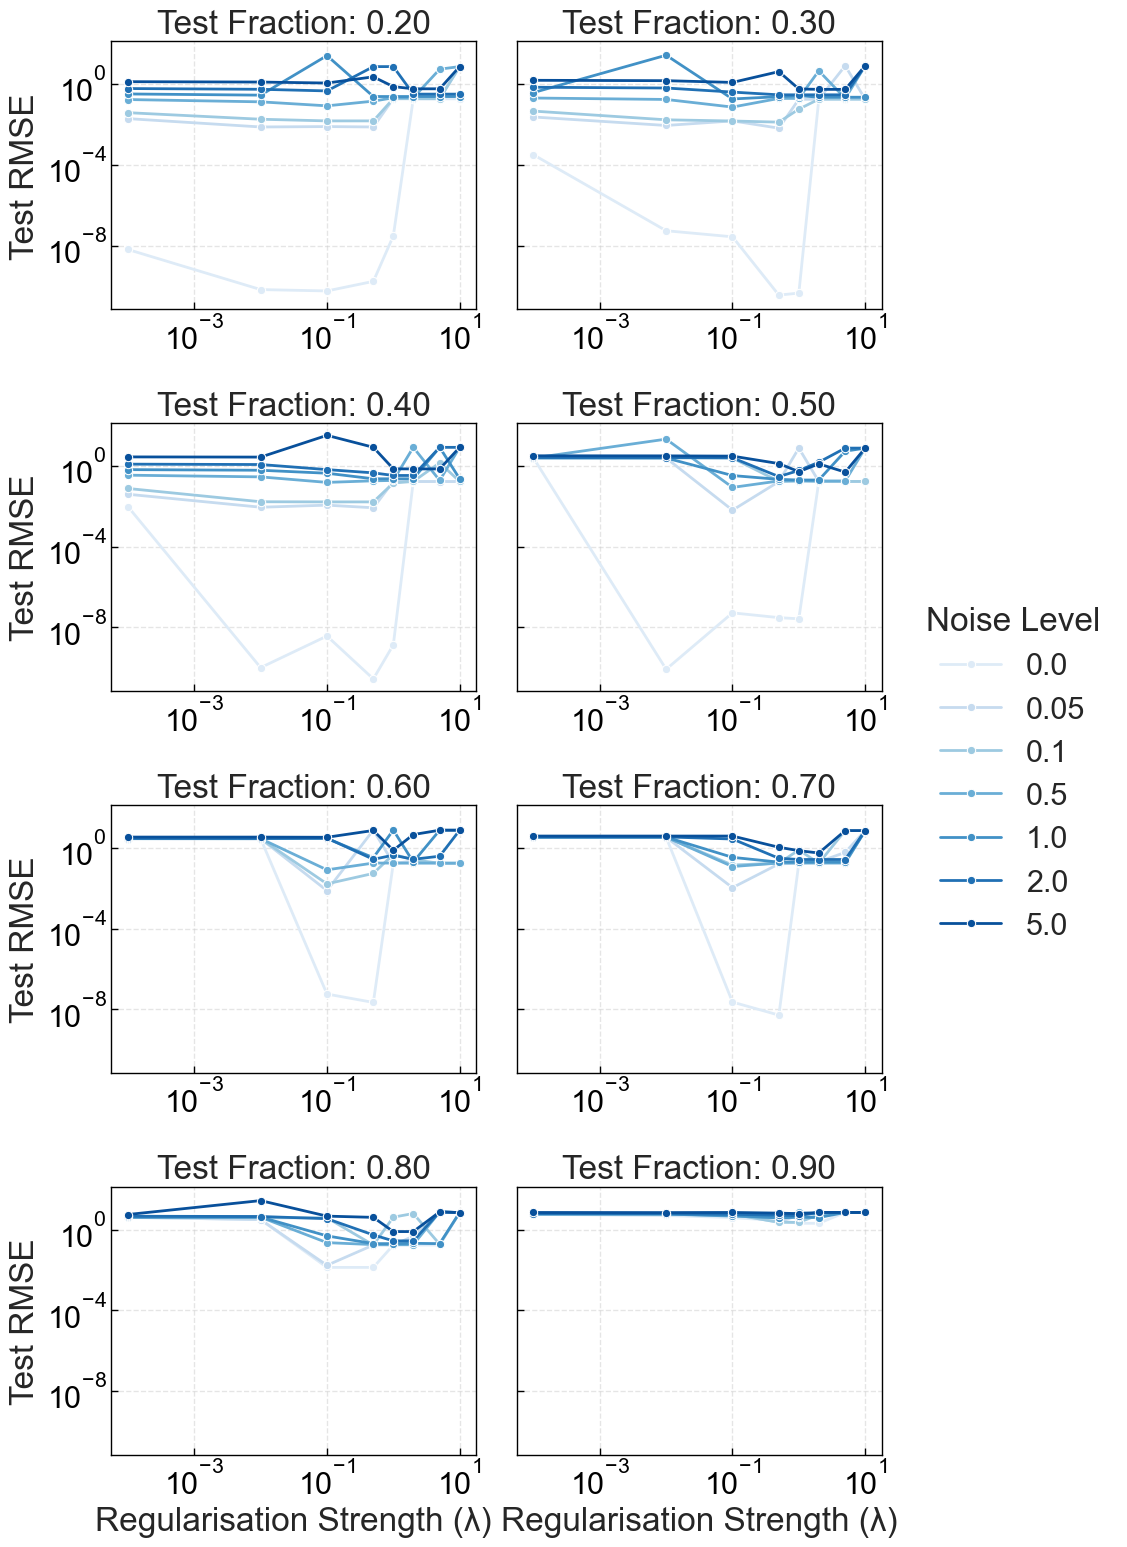

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Normalize the noise values to determine gradient mapping
unique_noise_values = sorted(plot_df["noise"].unique())  # Sort to ensure consistent mapping
n_colors = len(unique_noise_values)

# Generate a sequential color palette with a gradient (e.g., "Blues", "Purples", etc.)
palette = sns.color_palette("Blues", n_colors=n_colors)  # Change "Blues" to other sequential palettes

# Create a mapping from noise levels to colors
hue_color_dict = {noise: color for noise, color in zip(unique_noise_values, palette)}

# Create the FacetGrid
g = sns.FacetGrid(
    plot_df,
    col="test_frac",
    hue="noise",
    col_wrap=2,
    height=4,
    aspect=1.20,
    sharey=True,
    sharex=False,
    legend_out=True,
    despine=False,
    palette=hue_color_dict  # Apply the mapped color gradient
)

# Plot RMSE vs plot_lambd with markers
g.map(sns.lineplot, "plot_lambd", "rmse", marker="o", lw=2)

# Add legend, axis labels, and overall title
g.add_legend(title="Noise Level")
g.set_axis_labels("Regularisation Strength (λ)", "Test RMSE")

# Set custom titles for each subplot
g.set_titles(col_template="Test Fraction: {col_name:.2f}")

# Set logarithmic scales for both axes
g.set(xscale="log")
g.set(yscale="log")

# Adjust layout and display the plot
g.tight_layout()
plt.show()
